# Data analysis of a moving company's customers

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats 

In [79]:
df = pd.read_csv('2018copy.csv')
df.shape

(347, 15)

In [71]:
gender= df['GENDER']
df['DEPOSIT'].replace(np.nan,0,inplace = True)
df['DURATION'].replace(np.nan,0,inplace = True)

### Show correlation of all the numeric values 

In [14]:
df.corr()['DEPOSIT'].sort_values()

ZIPCODE      -0.049716
FLIGHT        0.124083
TRUCK SIZE    0.270394
WORKERS       0.435302
DURATION      0.870096
DEPOSIT       1.000000
Name: DEPOSIT, dtype: float64

### Vizualize the correlation between the strongest feature and the deposit column 

           DEPOSIT  DURATION
DEPOSIT   1.000000  0.870096
DURATION  0.870096  1.000000


(0, 1571.3821898137405)

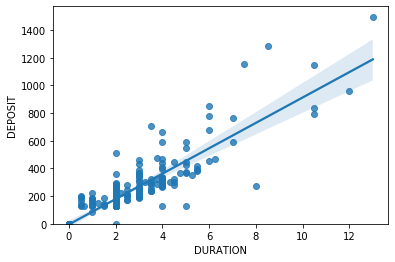

In [7]:
print(df[['DEPOSIT','DURATION']].corr())
sns.regplot(x='DURATION',y='DEPOSIT',data=df)
plt.ylim(0,)

In [20]:
pearson_coef, p_value = stats.pearsonr(df['DURATION'],df['DEPOSIT'])
print('The Pearson Correlation Coefficient is',pearson_coef,' with a P-value of P = ',p_value)

The Pearson Correlation Coefficient is 0.89835447578445  with a P-value of P =  2.3608255053554948e-150


### How much each vendor contributed to total revenue

In [80]:
df_group_one = df[['VENDOR','DEPOSIT']]
df_group_one = df_group_one.groupby(['VENDOR'],as_index=True).sum().sort_values('DEPOSIT',ascending=False)
df_group_one

,DEPOSIT
VENDOR,
MH,28655.55
MS,28463.39
NM,8532.50
EML,7185.00
SML,6031.08
(CANCELLED) MH,399.50
(CANCEL) MS,181.90
(CANECL) MS,129.05
(CANCEL) SML,83.11


Text(0.5, 1.0, 'Histogram of Vendor Deposits')

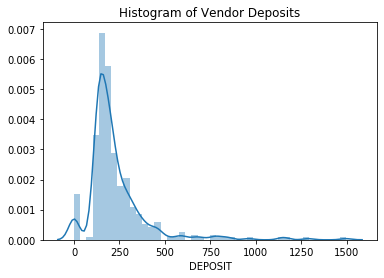

In [82]:
sns.distplot(df['DEPOSIT']).set_title('Histogram of Vendor Deposits')

### Average cost of move for each gender

In [67]:
gender_group = df[['GENDER','DEPOSIT']]
gender_group = gender_group.groupby(['GENDER']).mean()
gender_group

,DEPOSIT
GENDER,
F,217.569231
M,244.967632


### Number of completed moves for each gender

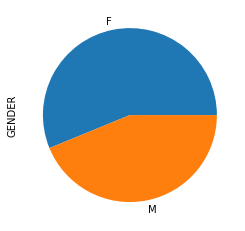

In [73]:
plot = gender.value_counts(normalize=True).plot.pie()

In [74]:
gender.value_counts(normalize=True)

F    0.56196
M    0.43804
Name: GENDER, dtype: float64

In [75]:
nyc_zip_codes = {
    
    'Bronx':
        {
        'Central Bronx': [10453,10457,10460],
        'Bronx Park and Fordham': [10458,10467,10468],
        'High Bridge and Morrisania': [10451,10452,10456],
        'Hunts Point and Mott Haven': [10454,10455,10459,10474],
        'Kingsbridge and Riverdale': [10463,10471],
        'Northeast Bronx': [10466,10469,10470,10475],
        'Southeast Bronx': [10461,10462,10464,10465,10472,10473]
        },
    'Manhattan':
    {
    'Central Harlem': [10026,10027,10030,10037,10039],
    'Chelsea and Clinton': [10001,10011,10018,10019,10020,10036],
    'East Harlem': [10029,10035],
    'Gramercy Park and Murray Hill': [10010,10016,10017,10022],
    'Greenwich Village and Soho': [10012,10013,10014],
    'Lower Manhattan': [10004,10005,10006,10007,10038,10280],
    'Lower East Side': [10002,10003,10009],
    'Upper East Side': [10021,10028,10044,10065,10075,10128],
    'Upper West Side': [10023,10024,10025],
    'Inwood and Washington Heights': [10031,10032,10033,10034,10040]
    },
    'Brooklyn':
    {
    'Central Brooklyn': [11212,11213,11216,11233,11238],
    'Southwest Brooklyn': [11209,11214,11228],
    'Borough Park': [11204,11218,11219,11230],
    'Canarsie and Flatlands': [11234,11236,11239],
    'Southern Brooklyn': [11223,11224,11229,11235],
    'Northwest Brooklyn': [11201,11205,11215,11217,11231],
    'Flatbush': [11203,11210,11225,11226],
    'East New York and New Lots': [11207,11208],
    'Greenpoint': [11211,11222],
    'Sunset Park': [11220,11232],
    'Bushwick and Williamsburg': [11206,11221,11237]
    },
    'Queens':
    {
    'Northeast Queens':[11361,11362,11363,11364],
    'North Queens': [11354,11355,11356,11357,11358,11359,11360],
    'Central Queens': [11365,11366,11367],
    'Jamaica': [11412,11423,11432,11433,11434,11435,11436],
    'Northwest Queens': [11101,11102,11103,11104,11105,11106],
    'West Central Queens': [11374,11375,11379,11385],
    'Rockaways': [11691,11692,11693,11694,11695,11697],
    'Southeast Queens': [11004,11005,11411,11413,11422,11426,11427,11428,11429],
    'Kew Gardens': [11415],
    'Southwest Queens': [11414,11416,11417,11418,11419,11420,11421],
    'West Queens': [11368,11369,11370,11372,11373,11377,11378]
    },
    'Staten Island': {
    'Port Richmond': [10302,10303,10310],
    'South Shore': [10306,10307,10308,10309,10312],
    'Stapleton and St.George': [10301,10304,10305],
    'Mid-Island': [10314]
    }

    }
#this function returns the name of the input's borough
def borough_lookup(zipcode):
    for borough in nyc_zip_codes:
        for place,zip_list in nyc_zip_codes[borough].items():
            if zipcode in zip_list:
                return borough
 
#this function returns the name of the input zip code's neighborhood
def neighborhood_lookup(zipcode):
    for borough in nyc_zip_codes:
        for place,zip_list in nyc_zip_codes[borough].items():
            if zipcode in zip_list:
                return place

### Examine the relative frequency of the top 20 neighborhoods where orders (moves) came from 

In [77]:
zippys = []
zipsx = df['ZIPCODE']
for zipcode in zipsx:
    zippys.append(neighborhood_lookup(zipcode))
zips = pd.Series(zippys)
zips.value_counts(normalize=True).head(20)

Chelsea and Clinton              0.084691
Upper East Side                  0.078176
Northwest Brooklyn               0.074919
Northwest Queens                 0.065147
Flatbush                         0.061889
Central Brooklyn                 0.061889
Gramercy Park and Murray Hill    0.058632
Lower East Side                  0.048860
Upper West Side                  0.048860
Bushwick and Williamsburg        0.045603
East Harlem                      0.042345
Greenpoint                       0.035831
Lower Manhattan                  0.029316
Inwood and Washington Heights    0.029316
Central Harlem                   0.022801
West Central Queens              0.022801
Greenwich Village and Soho       0.016287
North Queens                     0.016287
Kingsbridge and Riverdale        0.013029
Jamaica                          0.013029
dtype: float64

#### *Abbreviations in the 'VENDOR' column refer to vendor codes used by the company for unique vendors*
#### *This dataset is from 347 customers from Jan. to July in 2018*